# Interactive PreliZ examples

The examples below can be executed from within this page thanks to embedded integration with Binder via Thebe.
Click on the button below and start playing with PreliZ right from your browser or open this notebook or Binder directly [![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=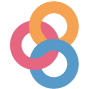)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Fpreliz%26urlpath%3Dtree%252Fpreliz%252Fdocs%252Fexamples%252Finteractive_examples.ipynb%26branch%3Dmain)


:::{thebe-button}
:::

In [ ]:
# latest PreliZ might not be installed
import sys

!{sys.executable} -m pip install preliz@git+https://github.com/arviz-devs/preliz.git

In [1]:
import arviz as az 
import preliz as pz
from IPython.display import Video

In [2]:
az.style.use("arviz-white")

(distributions_interactive)=

## Distributions

PreliZ is a collection of functions aiming at help you define priors for your models. Sometimes we just need to quickly inspect how a distributions looks like given different set of parameters.

With PreliZ we can easily plot the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) of a given distribution.

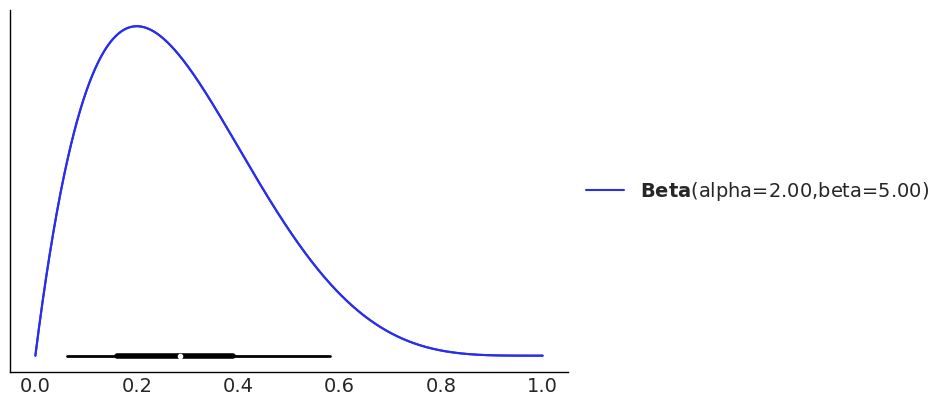

In [3]:
pz.Beta(2,5).plot_pdf(box=True);

Besides the PDF in blue, we get a box-like-plot, that may help us interpret wath a `Beta(2, 5)` means. The white dot represents the mean, the wider line the interquartile range, i.e the interval defined by the quantiles 0.25 and 0.75 (or in other words the central 50% of the distribution) and the thiner lines the interval defined by the 0.05 and 0.95 quantiles.

For simplicity we also use `plot_pdf` for discrete distributions

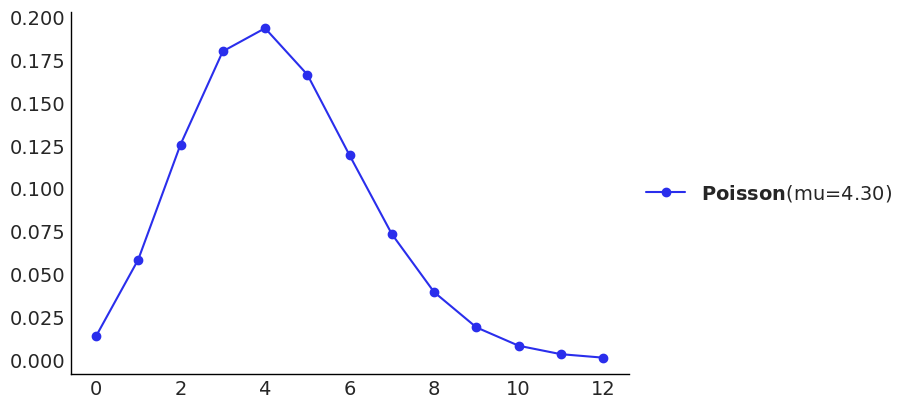

In [4]:
pz.Poisson(4.3).plot_pdf();

We can also plot and compare more than one distribution at the same time.

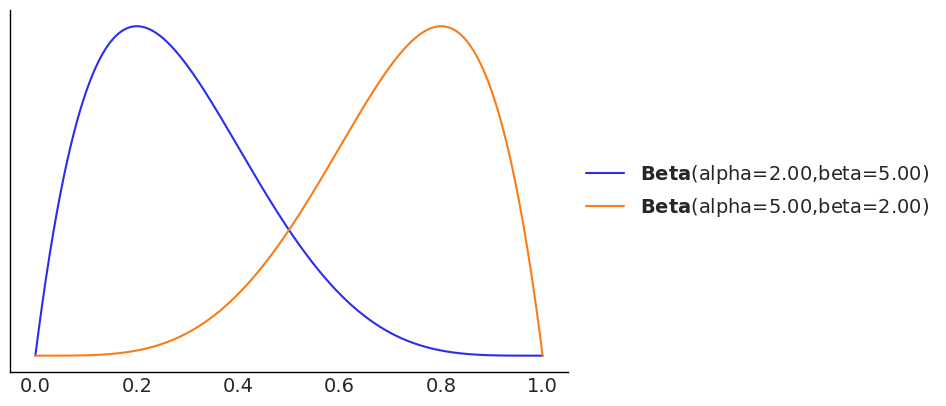

In [5]:
pz.Beta(2,5).plot_pdf()
pz.Beta(5,2).plot_pdf();

We can also easily plot the [cumulative distribution function](https://en.wikipedia.org/wiki/cumulative_distribution_function) (cdf).

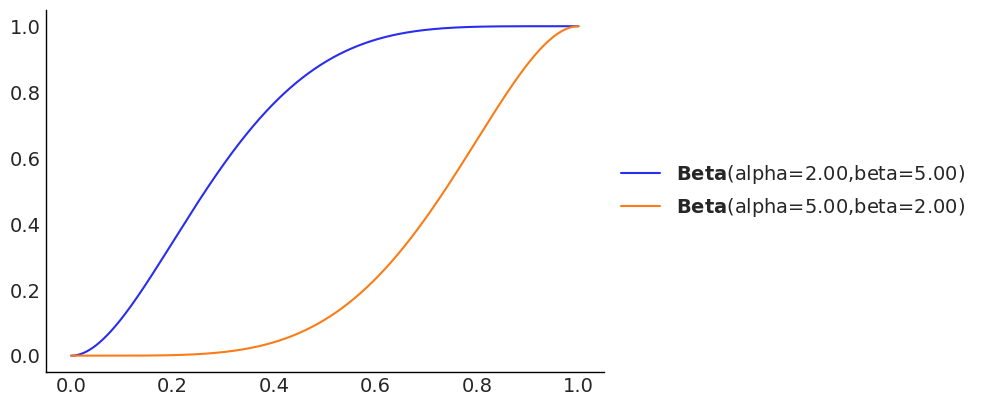

In [6]:
pz.Beta(2,5).plot_cdf();
pz.Beta(5,2).plot_cdf();

and finally the [quantile function](https://en.wikipedia.org/wiki/Quantile_function), also known as the percentile function or the inverse of the cdf.

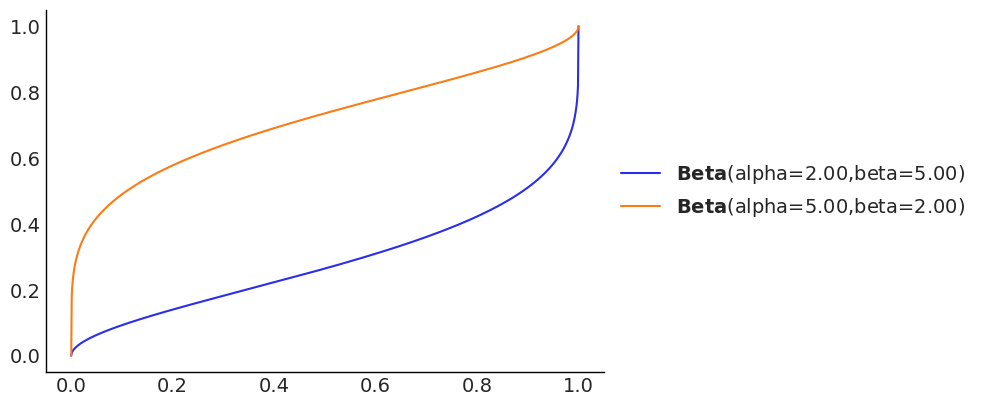

In [7]:
pz.Beta(2,5).plot_ppf();
pz.Beta(5,2).plot_ppf();

PreliZ distributions wraps scipy distributions, so once we define a distributions by passing their parameters we have access to the underlying `rv_frozen` object

In [8]:
dist = pz.Beta(2, 2)
dist.rv_frozen.rvs(10)

array([0.45938293, 0.33435782, 0.15654997, 0.31836032, 0.35778686,
       0.22705863, 0.67572655, 0.60335183, 0.13905774, 0.25202079])

(maxent_interactive)=

## From intevals to distributions

Sometimes, instead of defining a prior by tweaking the parameters of a given distribution, we would like to find a distribution that has certain mass inside some interval. Preliz can do this with the `pz.maxent` function, that adds one aditional constraint, it returns the maximum entropy distribution. Having priors with maximum entropy makes sense as this guarantess that we have the less informative distribution, given a set of contraints. In summary `pz.maxent` will find the distribution with maximum entropy that have a certain mass inside a given interval.

Here we compare a Beta and a Normal, with the constraints of having 0.6 of the probability mass inside the interval 0.3, 0.8.

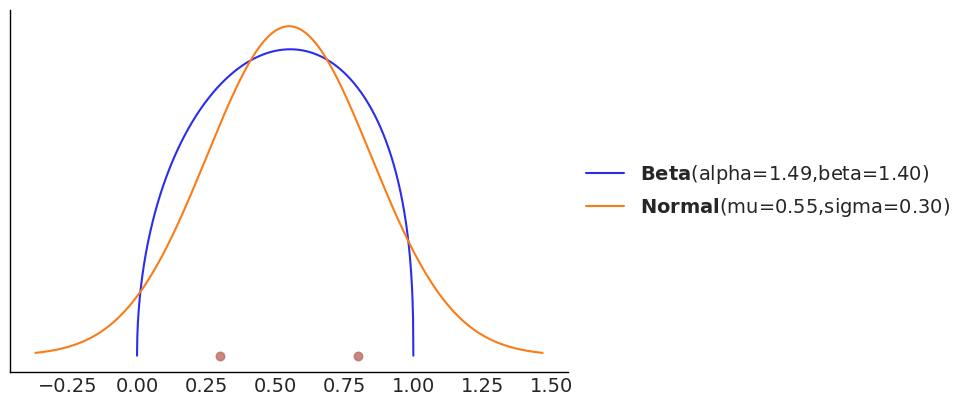

In [9]:
pz.maxent(pz.Beta(), 0.3, 0.8, 0.6)
pz.maxent(pz.Normal(), 0.3, 0.8, 0.6);

(roulette_interactive)=
# `preliz.roulette`

The roulette methods allows to find prior distributions by *drawing*, for this task we are offered with a grid of m equally sized bins covering the range of x. And we have to allocate a total of n chips between the bins. In other words we use a grid to draw a histogram and the function will try to tell us what distributions, from a given pool of options, fit betters.

When called, the `pz.roulette()` function, will pop up a Tkinter window. This pop-up window is not currently working inside binder. In case you can not see the pop-up windows, here you have short video.

In order to get the fitted distribution in the bottom panel, you have to move the cursor out of the figure.

In [10]:
Video("roulette_example.webm")

In [11]:
pz.roulette()